In [126]:
#3 Compute differing data distributions into visuals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("survey.csv")


    school_year  participation        GPA
0        Senior              1  2.5 - 2.9
1        Senior              3  3.0 - 3.4
2        Senior              2  3.5 - 4.0
3        Junior              1  3.0 - 3.4
4        Senior              1  3.5 - 4.0
..          ...            ...        ...
183      Junior              5  3.0 - 3.4
184      Junior              1  3.5 - 4.0
185      Junior              5  3.0 - 3.4
186      Junior              5  2.5 - 2.9
187      Junior              1  3.0 - 3.4

[188 rows x 3 columns]


<AxesSubplot:xlabel='GPA'>

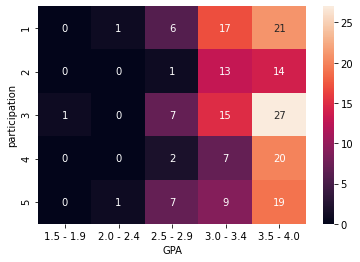

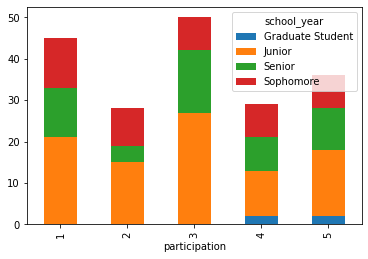

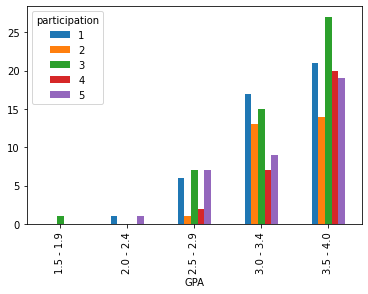

In [127]:

df['school_year']= df.filter(items = ['What school year are you in?'])
df['participation']= df.filter(items = ['What is your opinion on participation credit in your classes?'])
df['GPA'] = df.filter(items = ['What is your current GPA?'])
df = df.filter(items = ['school_year', 'participation', 'GPA'])
print(df)
schoolYearVsParticipation = pd.crosstab(df.participation, df.school_year)
GPAVsParticipation = pd.crosstab(df.GPA, df.participation)
df['school_year'].replace("Sophomore", 0, inplace = True)
df['school_year'].replace("Junior", 1, inplace = True)
df['school_year'].replace("Senior", 2, inplace = True)
df['school_year'].replace("Graduate Student", 3, inplace = True)
sns.heatmap(GPAVsParticipation.T, annot=True)
schoolYearVsParticipation.plot.bar(stacked=True)
GPAVsParticipation.plot.bar(stacked=False)
# print("There is a very little positive relation between commute times and stress levels.")

[[ 0  0  1  0  0]
 [ 1  0  0  0  1]
 [ 6  1  7  2  7]
 [17 13 15  7  9]
 [21 14 27 20 19]]


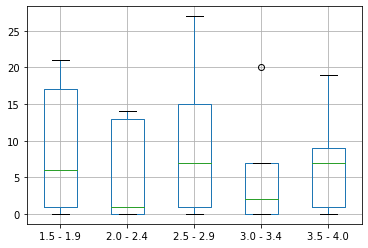

In [128]:
print(GPAVsParticipation.iloc[:5].values)
ax = pd.DataFrame(GPAVsParticipation.iloc[:5].values,
                  columns=['1.5 - 1.9','2.0 - 2.4','2.5 - 2.9','3.0 - 3.4','3.5 - 4.0'])
boxplot = ax.boxplot(column=['1.5 - 1.9','2.0 - 2.4','2.5 - 2.9','3.0 - 3.4','3.5 - 4.0'])